## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
# Setting tensorflow version to 2.x
%tensorflow_version 2.x 
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0
2.1.0


In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras import utils

In [4]:
# Importing fashion_mnist dataset from keras.datasets
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [5]:
print("No. of samples in training dataset :",x_train.shape[0])
print("No. of samples in testing dataset :",x_test.shape[0])

No. of samples in training dataset : 60000
No. of samples in testing dataset : 10000


In [6]:
# Examining the dataset
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(60000, 28, 28)
(60000,)
Shape of test data:
(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [7]:
# Fetch one image data and use shape function to get the dimensions
print("Dimensions of an image in the dataset : ",x_train[0].shape)

Dimensions of an image in the dataset :  (28, 28)


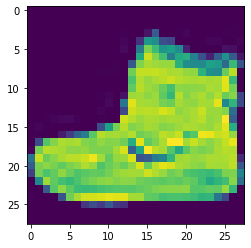

In [8]:
# Show one of the images from the training dataset
plt.imshow(x_train[0])

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
# Number of classes = 10 in fashion_MNIST
# One hot encoding of test and train labels
y_train = utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = utils.to_categorical(y_test, num_classes=10, dtype='float32')

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
# Normalization of pixel values (to [0-1] range)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [12]:
# check shape
x_train[0].shape

(28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np

from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers

import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# Setting number of epochs & batch size
EPOCHS= 10
BATCH_SIZE= 32

In [15]:
# Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, (3,3)))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
  validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.3738 - accuracy: 0.8667 - val_loss: 0.2918 - val_accuracy: 0.8902
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2274 - accuracy: 0.9162 - val_loss: 0.2594 - val_accuracy: 0.9043
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1615 - accuracy: 0.9404 - val_loss: 0.2445 - val_accuracy: 0.9140
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1100 - accuracy: 0.9592 - val_loss: 0.2809 - val_accuracy: 0.9054
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0724 - accuracy: 0.9733 - val_loss: 0.3159 - val_accuracy: 0.9141
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0475 - accuracy: 0.9827 - val_loss: 0.3550 - val_accuracy: 0.9159
Epoch 7/10
60000/60000 [=========================

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0

In [17]:
loss_and_metrics = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.5912 - accuracy: 0.9109


In [18]:
print(model.metrics_names)
print(loss_and_metrics)

['loss', 'accuracy']
[0.5911856830704957, 0.9109]


In [0]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

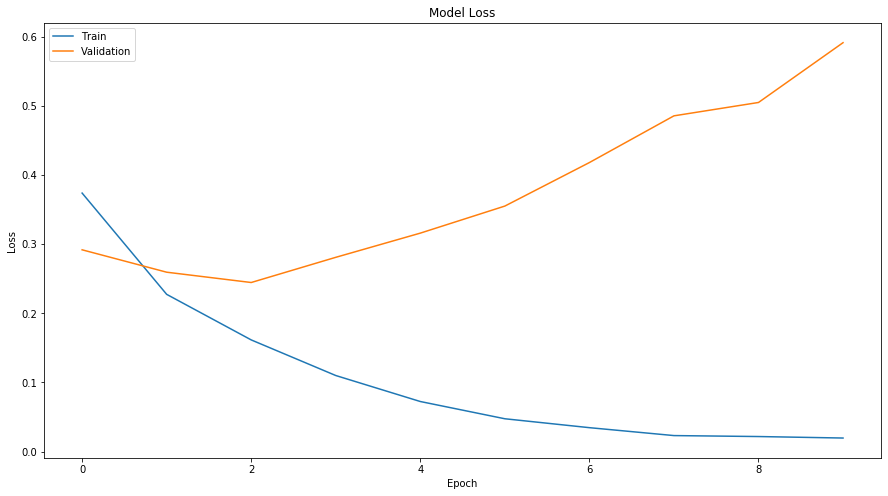

In [20]:
plotLosses(history)

In [0]:
def plotAccuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

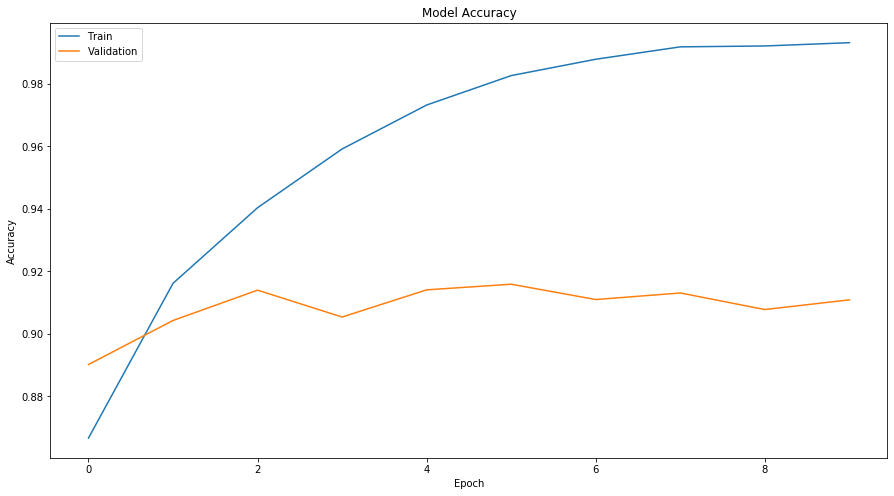

In [22]:
plotAccuracy(history)

Train accuracy : 0.9932167
Test accuracy : 0.9109


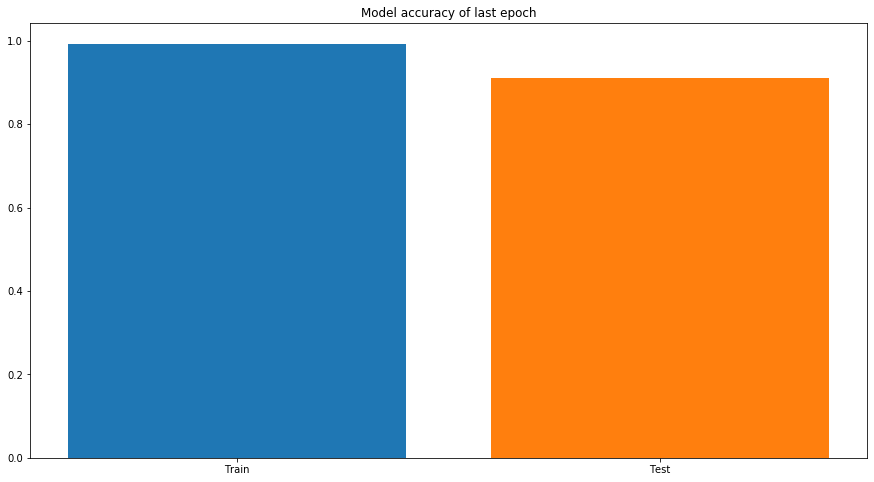

In [23]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Setting number of epochs & batch size
BATCH_SIZE = 32
EPOCHS = 10

In [27]:
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, (3,3), input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, (3,3)))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
history = model2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, 
  validation_data=(x_test, y_test), callbacks=callback_list)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3904 - accuracy: 0.8582 - val_loss: 0.3066 - val_accuracy: 0.8863
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2560 - accuracy: 0.9071 - val_loss: 0.2491 - val_accuracy: 0.9091
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2090 - accuracy: 0.9225 - val_loss: 0.2341 - val_accuracy: 0.9146
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1723 - accuracy: 0.9357 - val_loss: 0.2465 - val_accuracy: 0.9107
Epoch 5/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1463 - accuracy: 0.9449 - val_loss: 0.2266 - val_accuracy: 0.9208
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1247 - accuracy: 0.9534 - val_loss: 0.2337 - val_accuracy: 0.9260
Epoch 7/10
60000/60000 [==========================

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [30]:
loss_and_metrics = model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.2728 - accuracy: 0.9264


In [31]:
print(model.metrics_names)
print(loss_and_metrics)

['loss', 'accuracy']
[0.27276397019773724, 0.9264]


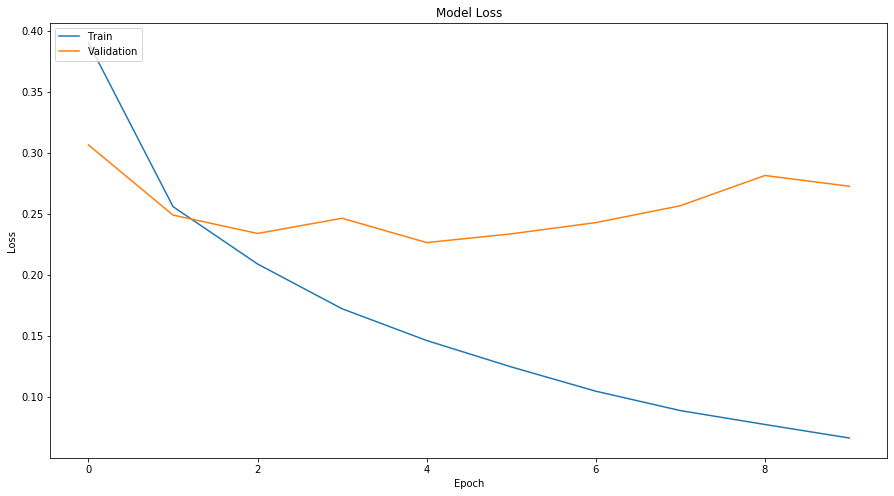

In [32]:
plotLosses(history)

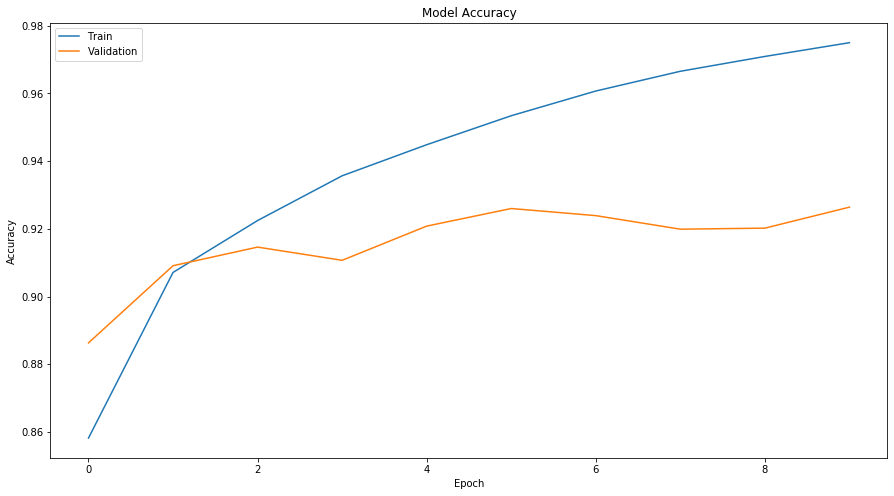

In [33]:
plotAccuracy(history)

Train accuracy : 0.975
Test accuracy : 0.9264


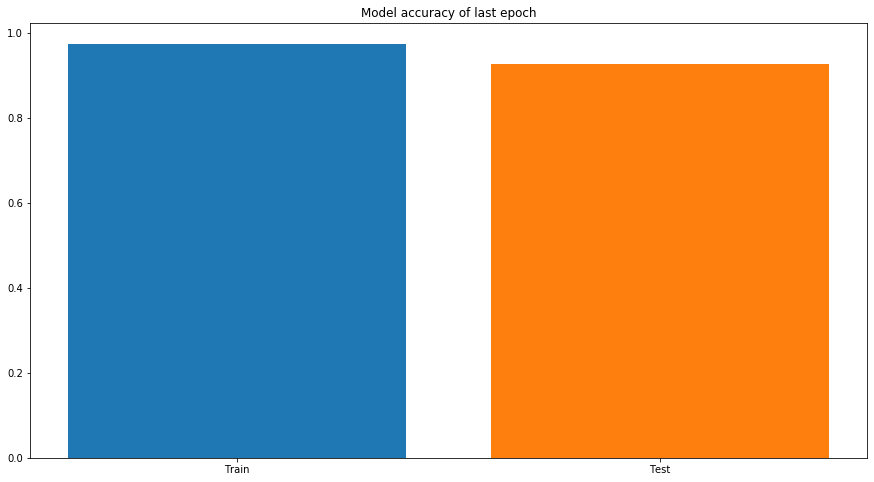

In [34]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

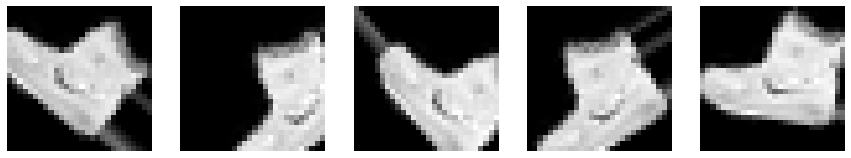

In [37]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [38]:
BATCH_SIZE = 32
EPOCHS = 10

history = model2.fit_generator(datagen.flow(x_train, y_train,batch_size=BATCH_SIZE),
                    steps_per_epoch=len(x_train)/BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=callback_list)




Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875.0 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9399 - accuracy: 0.6561 - val_loss: 0.4487 - val_accuracy: 0.8430
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6973 - accuracy: 0.7416 - val_loss: 0.3983 - val_accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6341 - accuracy: 0.7653 - val_loss: 0.3931 - val_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5899 - accuracy: 0.7806 - val_loss: 0.3949 - val_accuracy: 0.8602
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5698 - accuracy: 0.7897 - val_loss: 0.3875 - val_accuracy: 0.8621
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5423 - accuracy: 0.8003 - val_loss: 0.3

In [39]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

###  Report the final train and validation accuracy

In [40]:
loss_and_metrics = model2.evaluate(x_train, y_train)

60000/60000 [==============================] - 4s 64us/sample - loss: 0.3670 - accuracy: 0.8686


In [41]:
print(model.metrics_names)
print(loss_and_metrics)

['loss', 'accuracy']
[0.36702157889008524, 0.86861664]


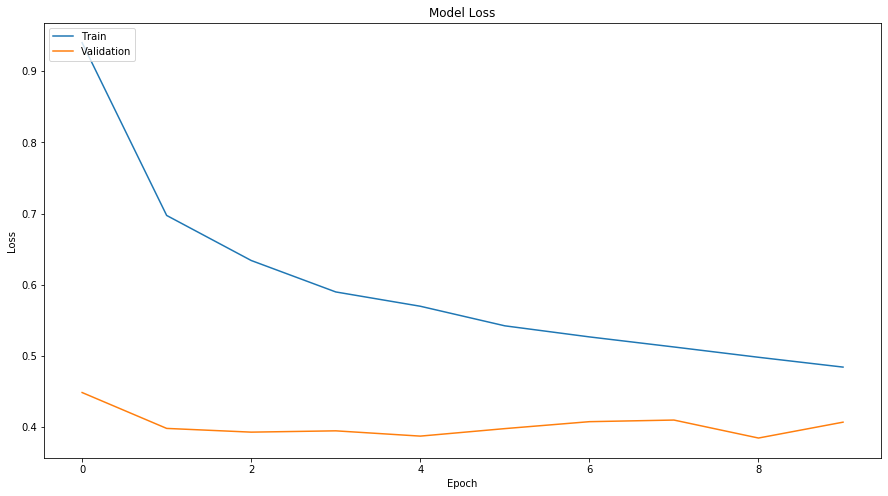

In [42]:
plotLosses(history)

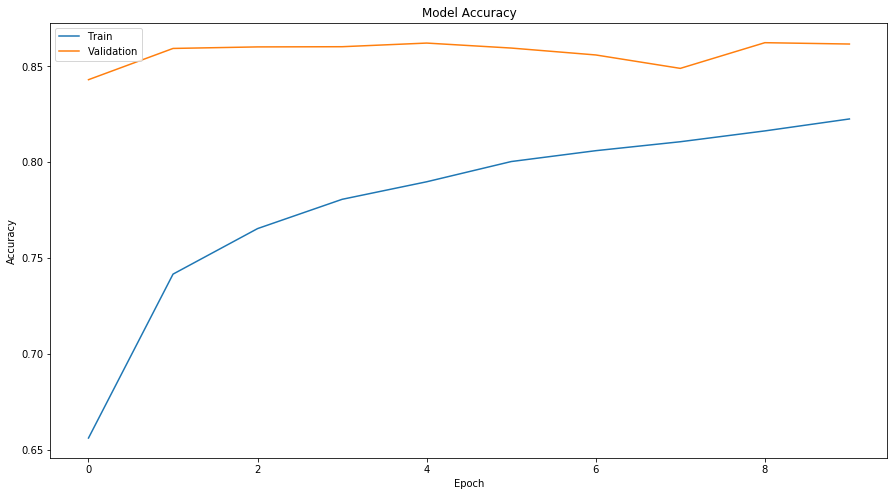

In [43]:
plotAccuracy(history)

Train accuracy : 0.8225167
Test accuracy : 0.8616


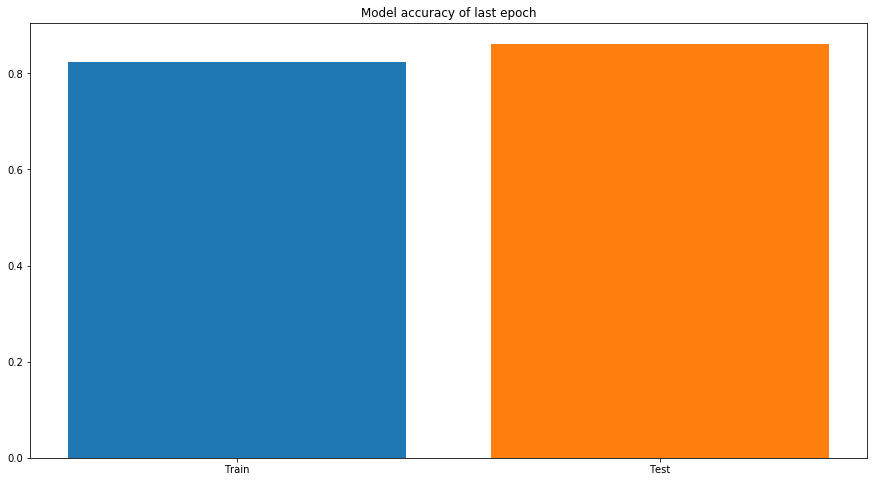

In [44]:
plt.title('Model accuracy of last epoch')
plt.bar('Train',history.history['accuracy'][-1])
plt.bar('Test',history.history['val_accuracy'][-1])
print ('Train accuracy :',history.history['accuracy'][-1])
print ('Test accuracy :',history.history['val_accuracy'][-1])

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Importing all the necessary libraries for data augmentation

from __future__ import absolute_import, division, print_function
import numpy as np

from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [46]:
# Importing CIFAR10 dataset from keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [47]:
# Examining the dataset
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
def data_gen():
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
      featurewise_center=False,  # set input mean to 0 over the dataset
      samplewise_center=False,  # set each sample mean to 0
      featurewise_std_normalization=False,  # divide inputs by std of the dataset
      samplewise_std_normalization=False,  # divide each input by its std
      zca_whitening=False,  # apply ZCA whitening
      rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
      width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
      height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
      horizontal_flip=True,  # randomly flip images
      vertical_flip=True)  # randomly flip images

      return datagen



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen = data_gen()
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

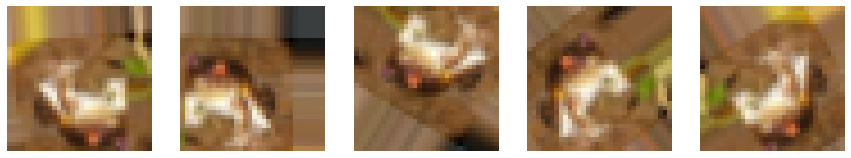

In [50]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap=None)
    plt.plot()
plt.show()